In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set_theme()

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.utils import get_config, read_file

In [4]:
config = get_config.read_yaml()
symbols = config['data']['symbols']
symbols

['ETH/USDT',
 'BTC/USDT',
 'BNB/USDT',
 'SOL/USDT',
 'ADA/USDT',
 'LINK/USDT',
 'XRP/USDT',
 'LTC/USDT',
 'XLM/USDT']

In [5]:
symbol = symbols[7]
symbol

'LTC/USDT'

In [6]:
data = read_file.read_raw_data(symbol)
data

Reading Raw data: LTC !
Successfully read: LTC !


,open,high,low,close,volume
timestamp,,,,,
2020-05-28 00:00:00,43.86,44.11,43.59,43.63,46088.87032
2020-05-28 04:00:00,43.62,43.68,43.15,43.31,44248.41440
2020-05-28 08:00:00,43.31,43.68,43.15,43.65,37102.44078
2020-05-28 12:00:00,43.65,44.57,43.62,44.48,74109.52377
2020-05-28 16:00:00,44.48,44.63,44.12,44.31,46980.21377
...,...,...,...,...,...
2025-06-30 04:00:00,87.37,87.62,85.86,86.46,42927.44300
2025-06-30 08:00:00,86.47,86.60,85.39,85.50,39178.64200
2025-06-30 12:00:00,85.49,86.26,84.75,85.96,70728.84100


In [7]:
symbol = symbols[0]
symbol

'ETH/USDT'

In [8]:
data = read_file.read_raw_data(symbol)
data

Reading Raw data: ETH !
Successfully read: ETH !


,open,high,low,close,volume
timestamp,,,,,
2020-05-28 00:00:00,208.29,208.97,206.23,206.39,57174.58460
2020-05-28 04:00:00,206.36,206.98,204.74,205.32,58091.35138
2020-05-28 08:00:00,205.32,207.80,204.67,207.57,63672.58000
2020-05-28 12:00:00,207.59,214.65,207.35,214.26,206879.94719
2020-05-28 16:00:00,214.26,215.58,213.39,214.66,121482.63358
...,...,...,...,...,...
2025-06-30 04:00:00,2499.20,2505.31,2456.37,2480.59,66271.42950
2025-06-30 08:00:00,2480.60,2486.64,2446.68,2458.52,59663.39510
2025-06-30 12:00:00,2458.51,2488.00,2431.00,2474.78,95201.23010


In [9]:
# define a function to plot various datafields
def plot_df(df, kind=None):
    if kind is None:
        df.plot(figsize = (15,8), fontsize=12) # plots the graph with specified plot and font size
    else:
        df.plot(kind=kind, figsize = (15,8), fontsize=12, bins=100)
    plt.legend(fontsize = 12) # shows legends
    plt.show() # makes the plot visible

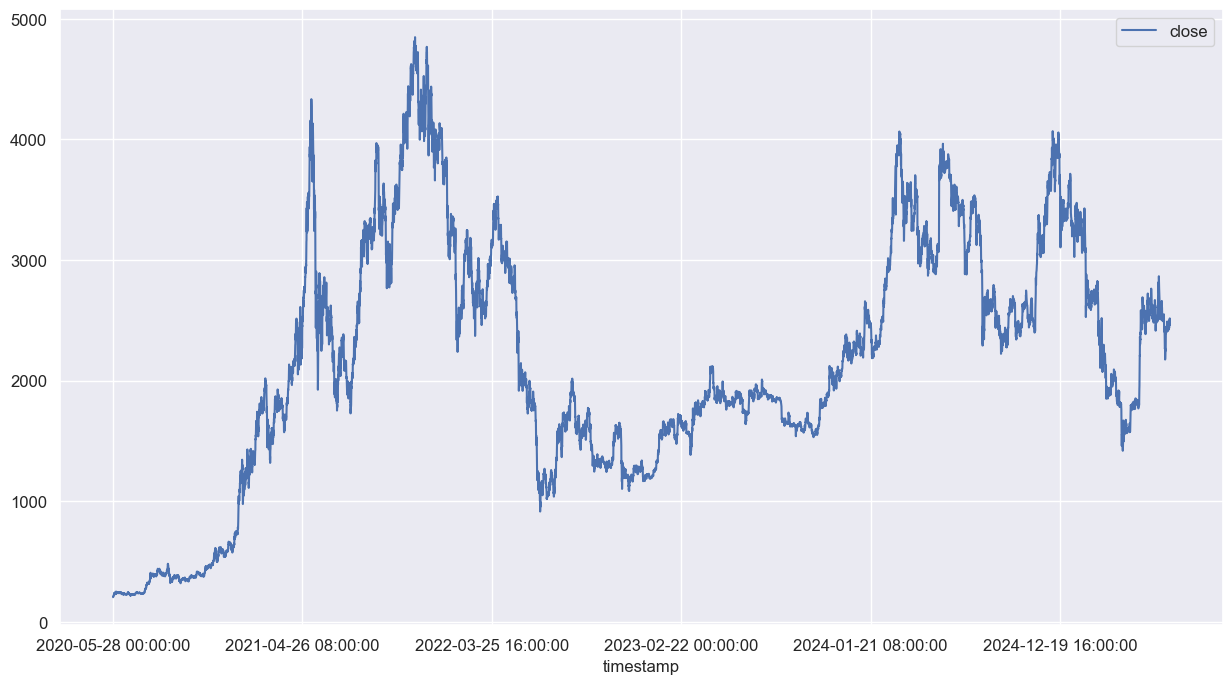

In [10]:
plot_df(data['close'])

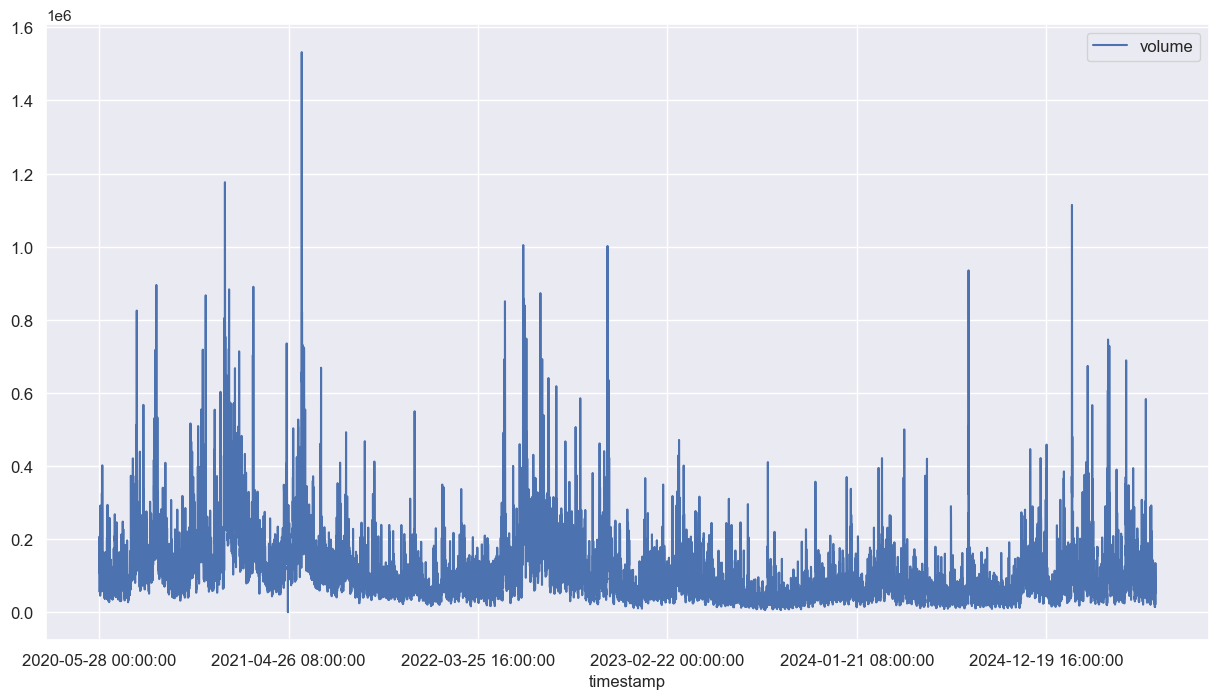

In [11]:
plot_df(data['volume'])

In [12]:
data =  read_file.read_preprocessed_training_data("SOL/USDT")
data

Reading preprocessed Training data: SOL !
Successfully read: SOL !


,open,high,low,close,volume,rsi,sma-50,sma-100,sma-200,ema-50,ema-100,ema-200,atr,adx
timestamp,,,,,,,,,,,,,,
2020-08-11 04:00:00,0.006420,0.008433,0.007236,0.006703,0.005098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-11 08:00:00,0.006858,0.007002,0.007209,0.007198,0.007425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-11 12:00:00,0.007196,0.008630,0.007285,0.007744,0.075702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-11 16:00:00,0.007684,0.008101,0.008286,0.007738,0.021217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-11 20:00:00,0.007757,0.007850,0.007633,0.008165,0.020335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-29 04:00:00,0.546560,0.546113,0.552918,0.547352,0.023111,0.534935,0.558101,0.593042,0.683197,0.584544,0.618071,0.692035,0.207398,0.222502
2024-06-29 08:00:00,0.547415,0.548975,0.558444,0.549918,0.026136,0.552171,0.558927,0.592584,0.682682,0.585104,0.618137,0.691804,0.199848,0.207051
2024-06-29 12:00:00,0.549981,0.547970,0.557291,0.549996,0.019934,0.552717,0.559858,0.592045,0.682164,0.585645,0.618204,0.691577,0.192964,0.190660
